In [75]:
# import libraies
import pandas as   pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
import joblib


## Load Data

In [ ]:
# Define the connection string for SQL Server using ODBC Driver 17
# Using Trusted_Connection means Windows Authentication is applied
conn_server =(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=GODSPOWER;'
    'DATABASE=telecom_customer_churn;'
    'Trusted_Connection=yes;'
)

# Define the SQL query (here pulling all columns from the specified table)
query = "select * from gold.customer_churned;"  # replace with your table
with pyodbc.connect(conn_server) as conn:
    df = pd.read_sql(query, conn)
    
df.head()

C:\Users\godsp\AppData\Local\Temp\ipykernel_32396\2161241534.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Customer_id,Gender,Age,Married,Number_of_Dependent,City,Zipcode,Latitude,Longitude,Number_of_Referrals,...,Monthly_Charge,Total_charges,Total_Refunds,Total_Extra_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,Population
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,65.6,593.30,0.00,0.0,381.51,974.81,Stayed,None,None,4498
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,-4.0,542.40,38.33,10.0,96.21,610.28,Stayed,None,None,31297
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,73.9,280.85,0.00,0.0,134.60,415.45,Churned,Competitor,Competitor had better devices,62069
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,98.0,1237.85,0.00,0.0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,46677
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,83.9,267.40,0.00,0.0,22.14,289.54,Churned,Dissatisfaction,Network reliability,42853


Check for the number of columns and rows

In [112]:
df.shape
print('There are about {0} rows and {1} column'.format(df.shape[0],df.shape[1]))

There are about 6589 rows and 41 column


Check data frame infomations

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6589 entries, 0 to 6588
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer_id                        6589 non-null   object 
 1   Gender                             6589 non-null   object 
 2   Age                                6589 non-null   int64  
 3   Married                            6589 non-null   object 
 4   Number_of_Dependent                6589 non-null   int64  
 5   City                               6589 non-null   object 
 6   Zipcode                            6589 non-null   int64  
 7   Latitude                           6589 non-null   float64
 8   Longitude                          6589 non-null   float64
 9   Number_of_Referrals                6589 non-null   int64  
 10  Tenure_in_Months                   6589 non-null   int64  
 11  Offer                              6589 non-null   objec

Check for Null values

In [79]:
df.isnull().sum()

Customer_id                          0
Gender                               0
Age                                  0
Married                              0
Number_of_Dependent                  0
City                                 0
Zipcode                              0
Latitude                             0
Longitude                            0
Number_of_Referrals                  0
Tenure_in_Months                     0
Offer                                0
Phone_Service                        0
Avg_Monthly_Long_Distance_charges    0
Multiple_Lines                       0
Internet_Service                     0
Internet_Type                        0
Avg_Monthly_GB_Download              0
Online_Security                      0
Online_Backup                        0
Device_Protection_Plan               0
Premium_Tech_Support                 0
Streaming_TV                         0
Streaming_Movies                     0
Streaming_Music                      0
Unlimited_Data           

Check for duplicates

In [114]:
duplicate_num=df[df.duplicated()]
print("There are {} duplicate(s)".format(duplicate_num.shape[0]))

There are 0 duplicate(s)


In [80]:
df.describe()

,Age,Number_of_Dependent,Zipcode,Latitude,Longitude,Number_of_Referrals,Tenure_in_Months,Avg_Monthly_Long_Distance_charges,Avg_Monthly_GB_Download,Monthly_Charge,Total_charges,Total_Refunds,Total_Extra_Charges,Total_Long_Distance_Charges,Total_Revenue,Population
count,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000
mean,46.760510,0.476097,93491.504477,36.199761,-119.757670,2.020944,34.499772,23.004277,20.876461,65.030695,2432.042243,2.080938,7.169525,798.087251,3235.218082,22116.481105
std,16.841362,0.968499,1857.575392,2.472459,2.155696,3.024016,23.968734,15.466844,20.406247,31.100727,2265.500080,8.125054,25.803163,853.767972,2854.600036,21217.958517
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,0.000000,0.000000,-10.000000,18.850000,0.000000,0.000000,0.000000,21.610000,11.000000
25%,33.000000,0.000000,92103.000000,33.989524,-121.788090,0.000000,12.000000,9.250000,4.000000,35.800000,544.550000,0.000000,0.000000,106.680000,835.450000,2271.000000
50%,46.000000,0.000000,93526.000000,36.245926,-119.601370,0.000000,32.000000,22.920000,17.000000,71.050000,1563.900000,0.000000,0.000000,472.680000,2376.450000,17372.000000
75%,60.000000,0.000000,95333.000000,38.169605,-117.967399,3.000000,57.000000,36.440000,27.000000,90.400000,4003.000000,0.000000,0.000000,1275.120000,5106.640000,36149.000000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,105285.000000


Investigate the target variable

In [81]:
df['Customer_Status'].value_counts()

Customer_Status
Stayed     4720
Churned    1869
Name: count, dtype: int64

In [82]:
round(df['Customer_Status'].value_counts() * 100/ len(df['Customer_Status']),0) 

Customer_Status
Stayed     72.0
Churned    28.0
Name: count, dtype: float64

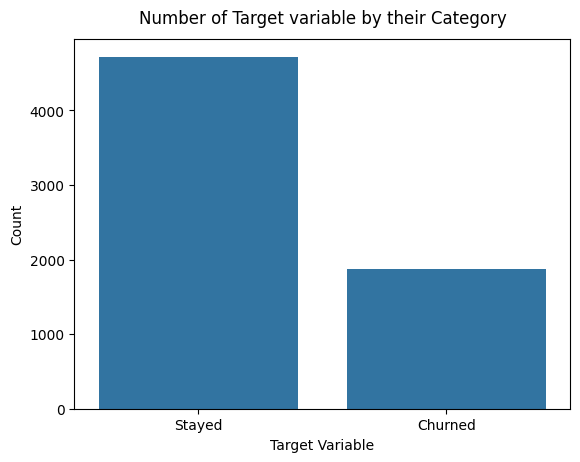

In [83]:
plt.figure(dpi=100)
ax=sns.barplot(x=df['Customer_Status'].value_counts().index,y=df['Customer_Status'].value_counts().values)
ax.set_ylabel("Count")
ax.set_xlabel("Target Variable")
ax.set_title("Number of Target variable by their Category",y=1.02)
plt.show()

* Data is highly imbalanced, ratio = 72 percent
* So we analyse the data with other features while taking the target values separately to get some insights.

In [115]:
# Create labels for tenure groups in 12-month intervals

labels = ['{0}-{1}'.format(i,i+11) for i in range(1,72,12)]
df['tenure_group']=pd.cut(df['Tenure_in_Months'],range(1,80,12),right= False,labels=labels)

In [117]:
# create age group colum by grouping age  into Young adult, Middle-aged Adult and senior citizen
def age_group(col):
    if col <= 35:
        return "Young Adult"
    elif  col <= 59:
        return "Middle-Aged Adult"
    else:
        return 'Senior Citizen'
    
df['Age group']= df['Age'].apply(age_group)


### Univirate Analysis

#### Analysis for Categorical Variable

In [116]:

#retrieve categorical columns
cols = df.drop(columns=['Customer_Status','Churn_Category', 'Churn_Reason','Customer_id','City']).select_dtypes(include=['category','object']).columns
cols


Index(['Gender', 'Married', 'Offer', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'tenure_group', 'Age group'],
      dtype='object')

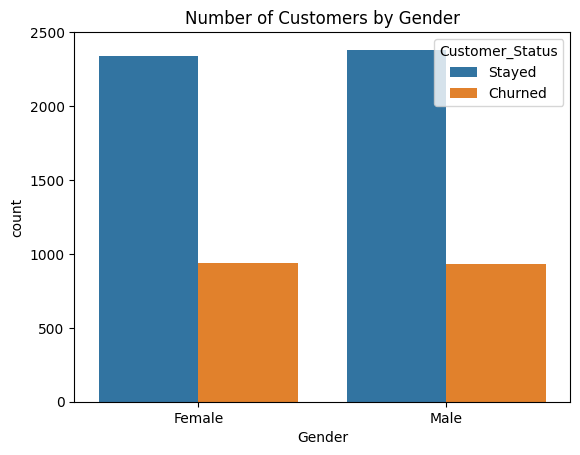

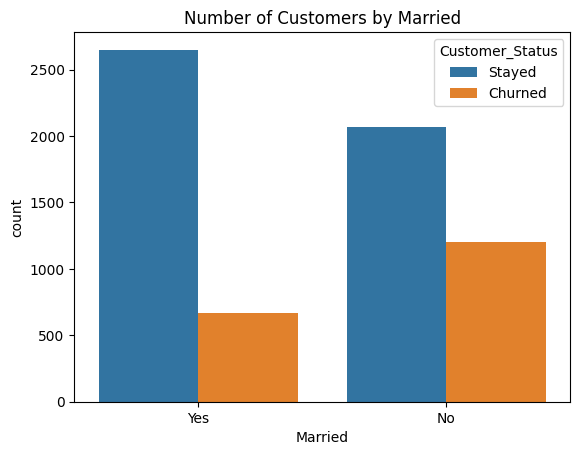

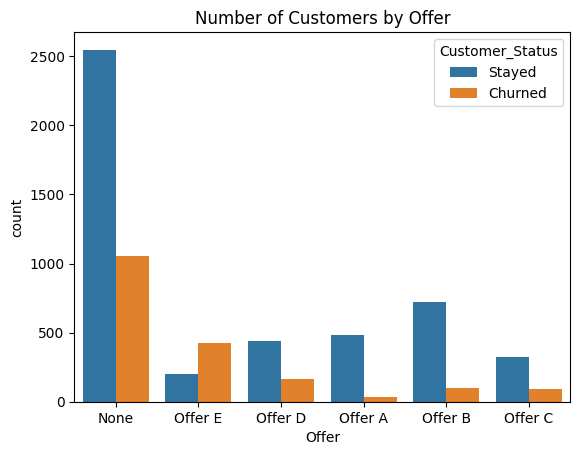

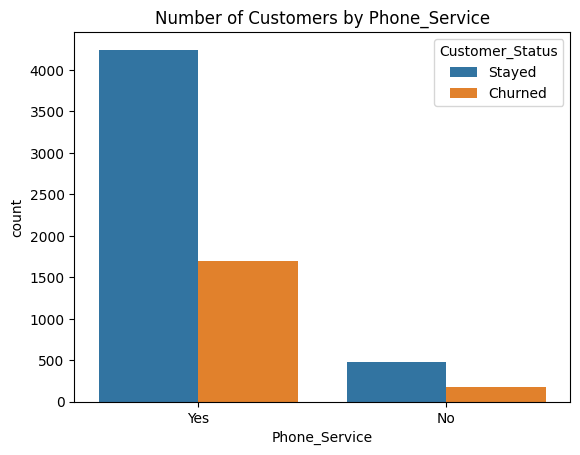

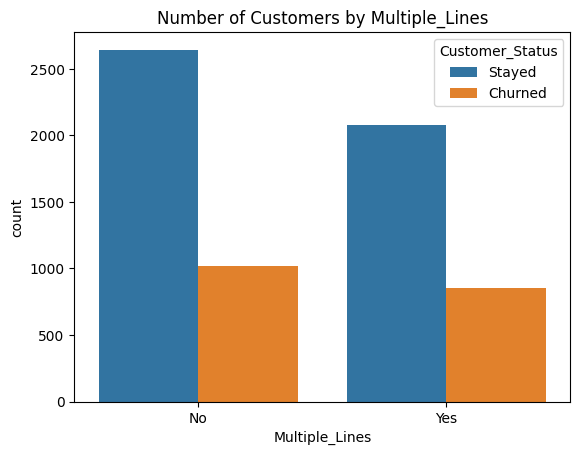

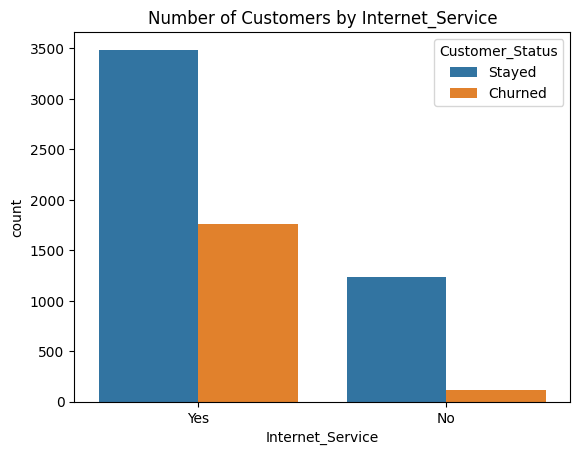

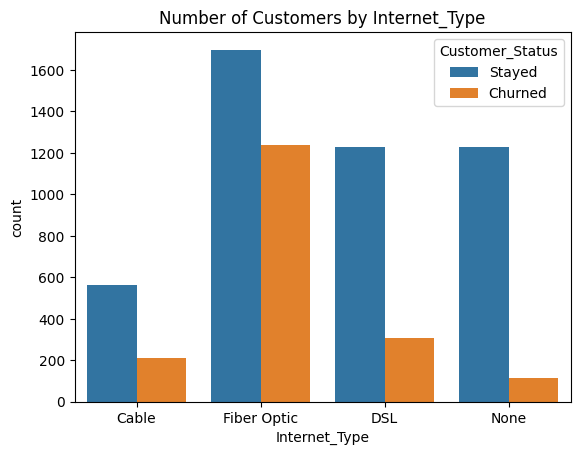

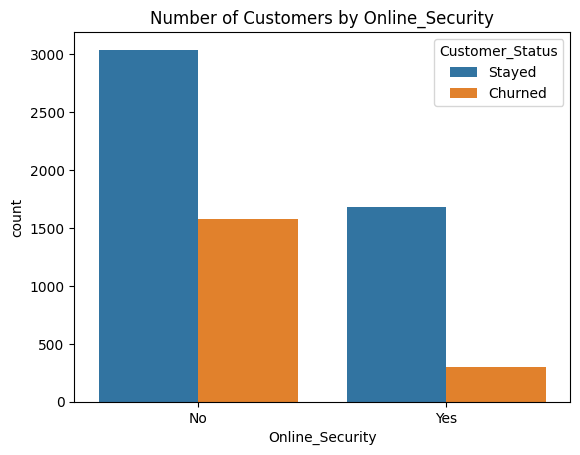

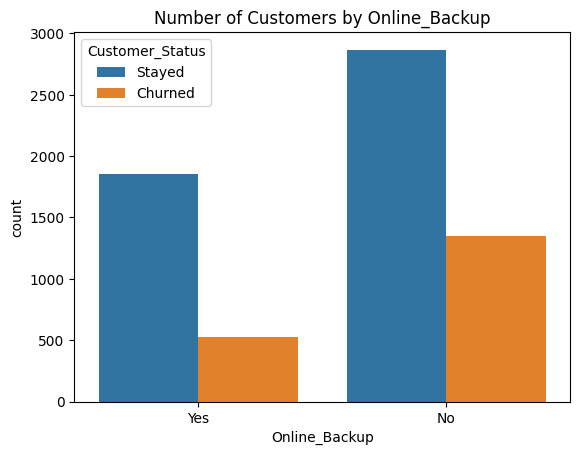

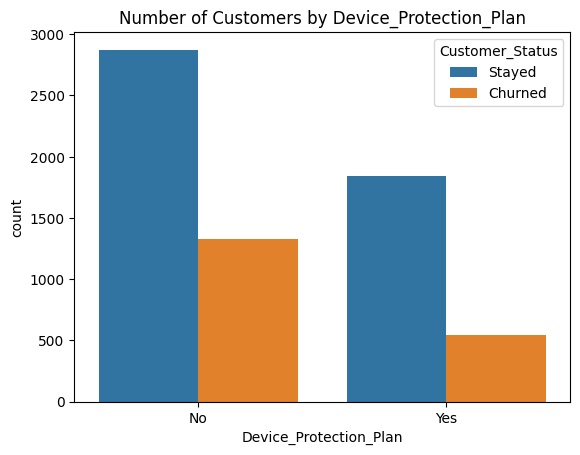

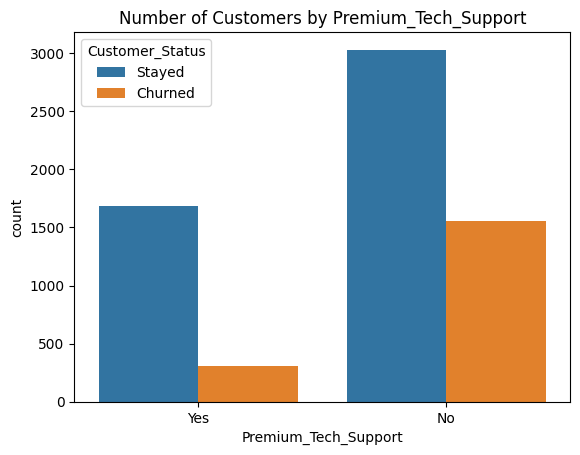

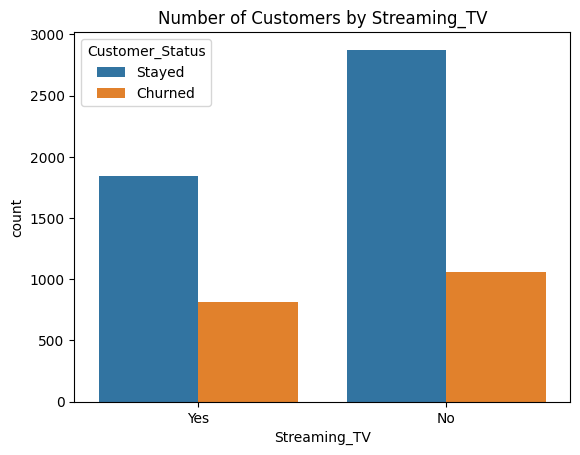

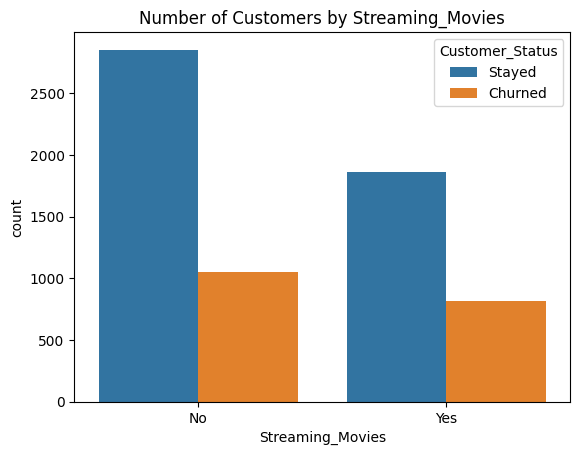

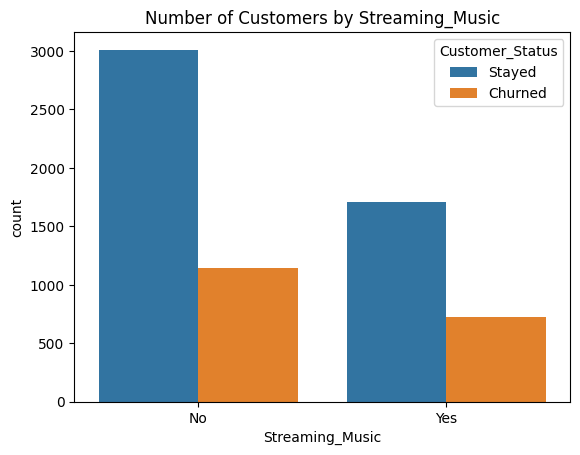

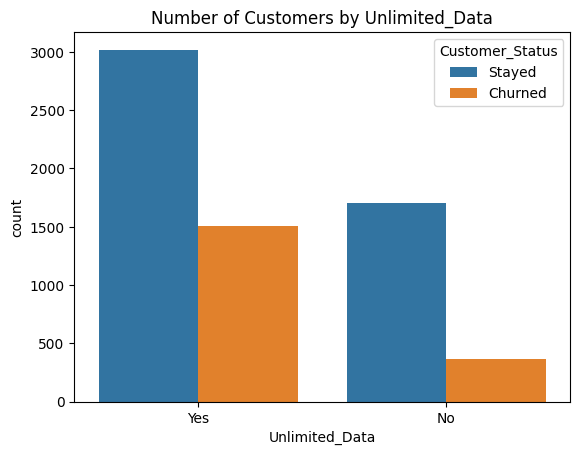

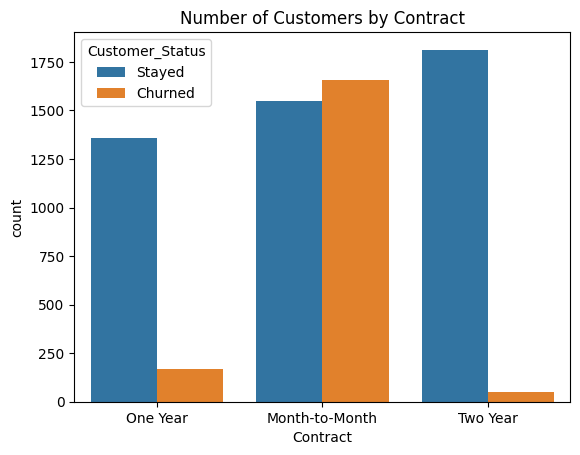

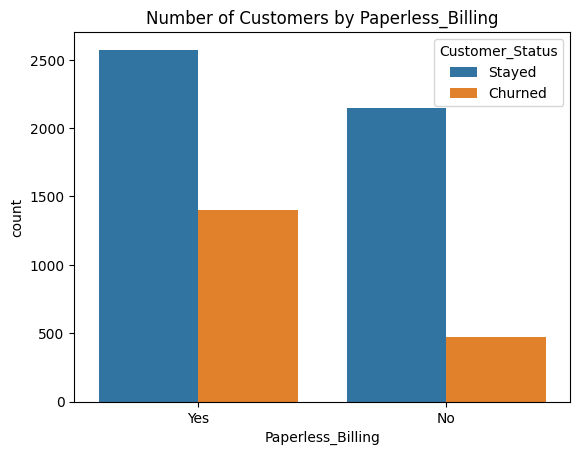

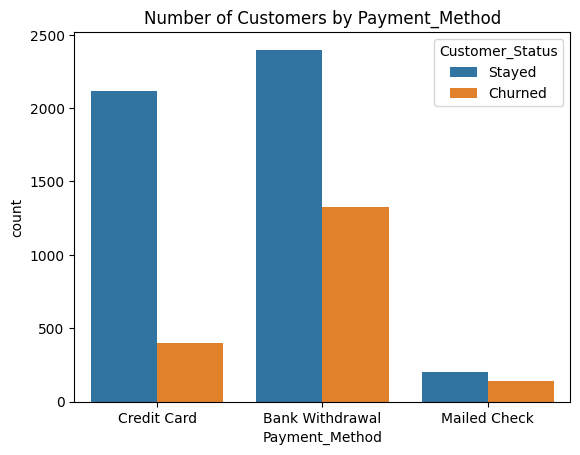

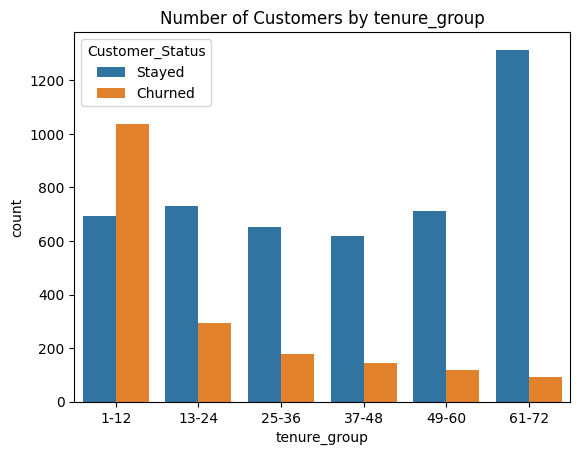

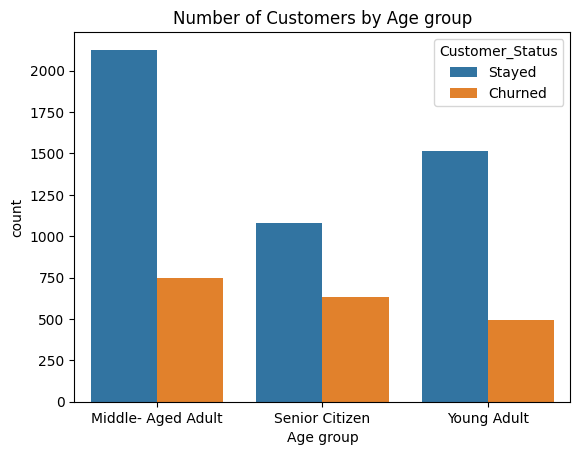

In [87]:
for i, index in enumerate(df[cols]):
    plt.figure(i)
    plt.title('Number of Customers by {0}'.format(index))
    sns.countplot(data=df,x=index, hue='Customer_Status')

#### Gender
Here’s the analysis of this categorical variable chart (Gender vs. Customer Status):

The chart shows the distribution of customers by gender (Male/Female) and their churn status (Stayed vs. Churned).

Both Male and Female customers have very similar patterns:

Around 2,300–2,400 customers stayed.

Around 900–950 customers churned.

This suggests that gender does not strongly influence churn behavior, since the churn rates for Male and Female customers are almost identical.

👉 Key Insight:<br>
Customer churn appears to be independent of gender. Both Male and Female customers are leaving the service at about the same proportion.

#### Phone Service
Most customers in the dataset have Phone Service = Yes.

Among them, over 4,200 customers stayed, while about 1,700 churned.

A much smaller group does not have phone service (Phone Service = No).

In this group, less than 500 stayed and around 200 churned.

👉 Key Insight:

Customers with phone service make up the majority of the base, and their churn numbers are higher simply because of that scale.

However, when comparing proportions, the churn rate seems comparable between customers with and without phone service.

This suggests that having or not having phone service is not a major driver of churn — churn is occurring in both groups at similar rates.


#### Offer

No Offer (None):

The largest group of customers fall into this category.

A significant portion of churned customers also come from this group.

This suggests that not having any offer is associated with higher churn risk.

Offer E:

Interestingly, this is the only offer where churned customers outnumber those who stayed.

This indicates Offer E may not be effective — customers who took this offer were more likely to leave.

Other Offers (A, B, C, D):

For Offers A, B, C, and D, more customers stayed than churned.

Offer B seems especially strong, with a large number of customers staying and very few churning.

Key Insights:

Customers without offers are more likely to churn → offering incentives might help retention.

Offer E may be poorly designed or attracting customers more prone to churn — it may need review or redesign.

Offer B looks promising as it’s associated with the highest retention relative to churn.


#### Contract

This bar chart shows the number of customers by their contract type and customer status (stayed or churned).

Here's a breakdown of the data by contract type:

One Year: The majority of customers on a one-year contract have stayed, with a very small number having churned.

Month-to-Month: This group has the highest number of churned customers, and the number of churned customers is even higher than the number of stayed customers in this category.

Two Year: The vast majority of customers on a two-year contract have stayed, with a very small number having churned.

The chart clearly indicates a strong relationship between contract type and customer churn. Customers on longer-term contracts (one-year and two-year) have a significantly lower churn rate than customers on a month-to-month contract. The month-to-month contract is by far the most susceptible to customer churn.


#### Paperless Payment

This bar chart displays the number of customers based on whether they have paperless billing and their customer status (stayed or churned).

Here's a breakdown of the data:

Paperless Billing: Yes

A very large number of customers with paperless billing have stayed.

A large number of customers with paperless billing have churned, representing a significant portion of this group.

Paperless Billing: No

A substantial number of customers without paperless billing have stayed.

A much smaller number of customers without paperless billing have churned.

The chart suggests that while paperless billing is a common feature, it's also associated with a higher churn rate. The majority of churned customers have paperless billing, while the churn rate among those without paperless billing is much lower.

####  Payment Method

This bar chart displays the number of customers by their payment method and customer status (stayed or churned).

Here's a breakdown of the data by payment method:

Credit Card: Customers who pay with a credit card have a very high retention rate, with a very low number of churned customers.

Bank Withdrawal: This payment method has the highest number of customers, both stayed and churned. The churn rate for this group appears to be quite high.

Mailed Check: This is the smallest group of customers. While the number of stayed customers is low, the number of churned customers is also low, but the churn rate appears to be higher than for credit cards.

The chart suggests a strong correlation between payment method and customer churn. Customers who use bank withdrawal as their payment method are the most likely to churn. Customers using credit cards have the lowest churn rate.

#### Tenure Group

This bar chart shows the number of customers by their tenure group (in months) and customer status (stayed or churned).

Here's a breakdown of the data by tenure group:

1-12 months: This group has the highest number of churned customers, and the number of churned customers is significantly higher than the number of stayed customers.

13-24 months: In this group, the number of stayed customers is more than double the number of churned customers.

25-36 months: The number of stayed customers is much higher than the number of churned customers.

37-48 months: The number of stayed customers is much higher than the number of churned customers.

49-60 months: The number of stayed customers is significantly higher than the number of churned customers.

61-72 months: This group has the highest number of stayed customers and the lowest number of churned customers.

The chart clearly indicates a strong inverse relationship between customer tenure and churn. Customers in their first year (1-12 months) are the most likely to churn. As tenure increases, the likelihood of a customer churning decreases significantly. The longest-tenured customers (61-72 months) are the most loyal.


#### Age Group
This bar chart shows the number of customers by their age group and customer status (stayed or churned).

Here's an analysis of the data by age group:

Middle-Aged Adult: This is the largest group of customers, with a significant number of both stayed and churned customers.

Senior Citizen: This group has the smallest total number of customers, with a lower number of both stayed and churned customers compared to the other groups.

Young Adult: This group has a substantial number of stayed customers and a moderate number of churned customers.

Looking at the proportion of churned customers within each age group, it appears that Middle-Aged Adults and Senior Citizens may have a slightly higher churn rate compared to Young Adults, although all three groups have a notable number of churned customers. The chart indicates that age group might not be as strong a predictor of churn as some of the other features you've shown.




#### Analysis for Numerical Variables

In [ ]:

#retrieve categorical columns
num_cols = df.drop(columns=['Customer_Status','Churn_Category', 'Churn_Reason','Customer_id','City','Zipcode', 'Latitude', 'Longitude']).select_dtypes(exclude=['category','object']).columns
num_cols

Index(['Age', 'Number_of_Dependent', 'Number_of_Referrals', 'Tenure_in_Months',
       'Avg_Monthly_Long_Distance_charges', 'Avg_Monthly_GB_Download',
       'Monthly_Charge', 'Total_charges', 'Total_Refunds',
       'Total_Extra_Charges', 'Total_Long_Distance_Charges', 'Total_Revenue',
       'Population'],
      dtype='object')

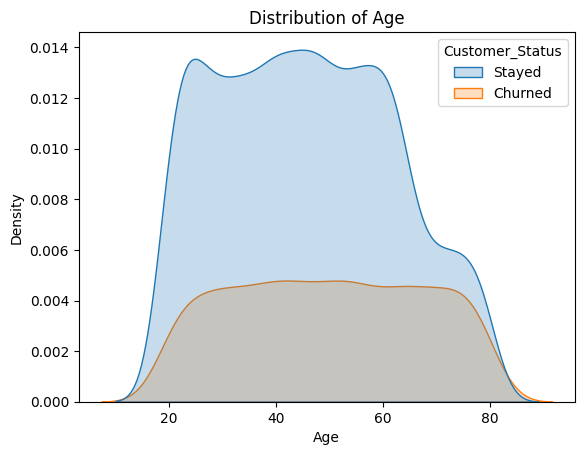

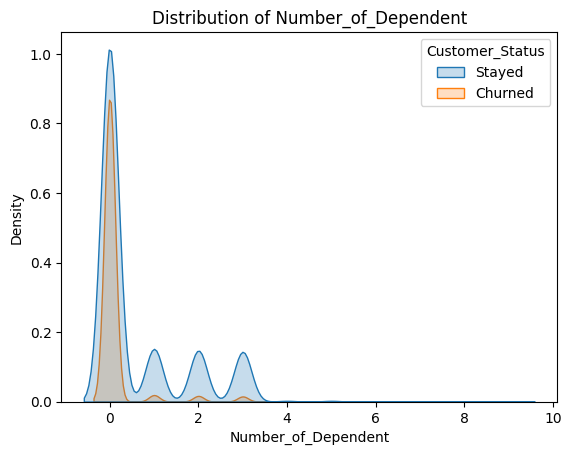

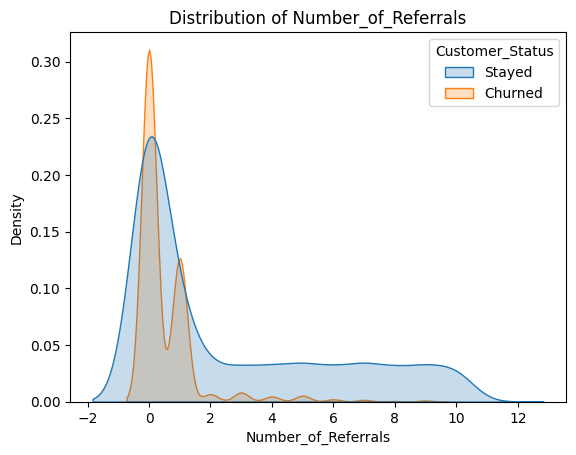

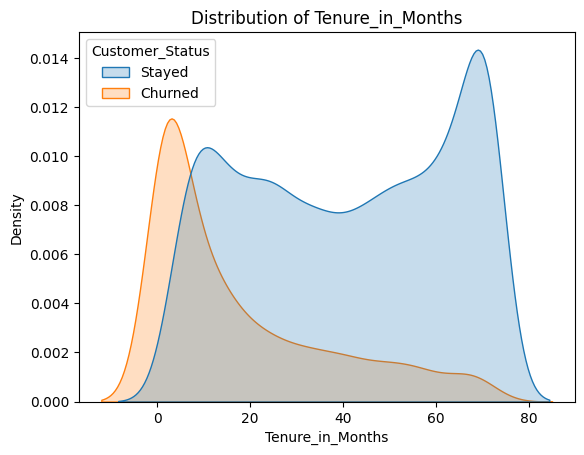

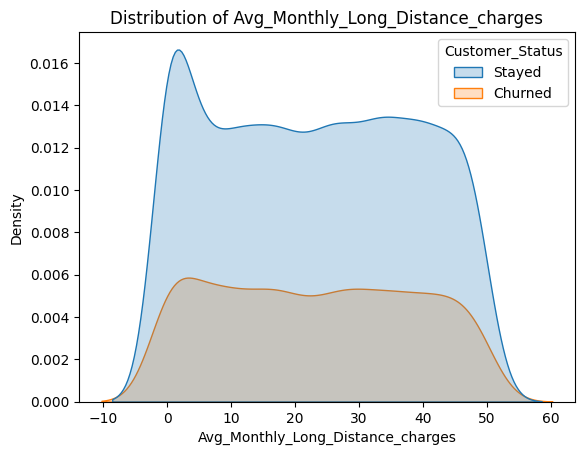

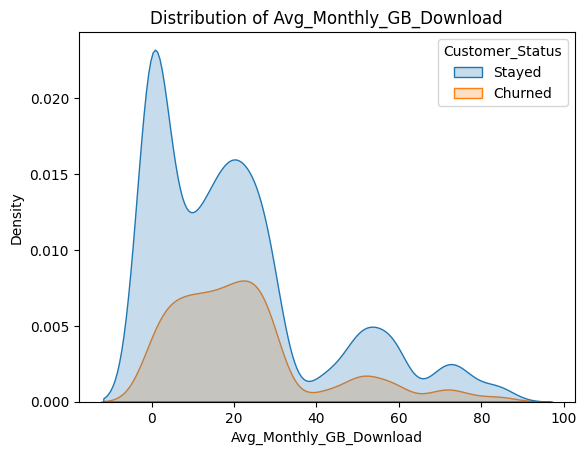

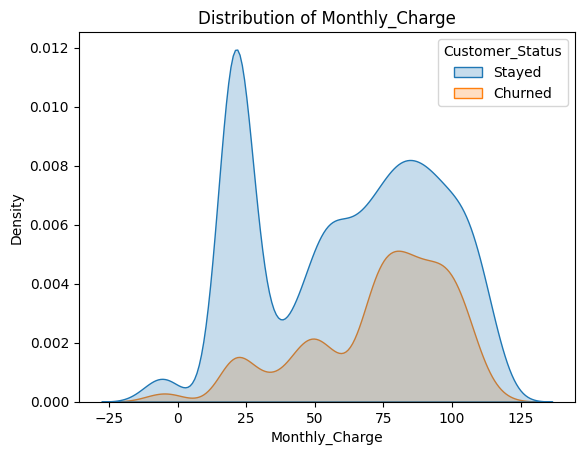

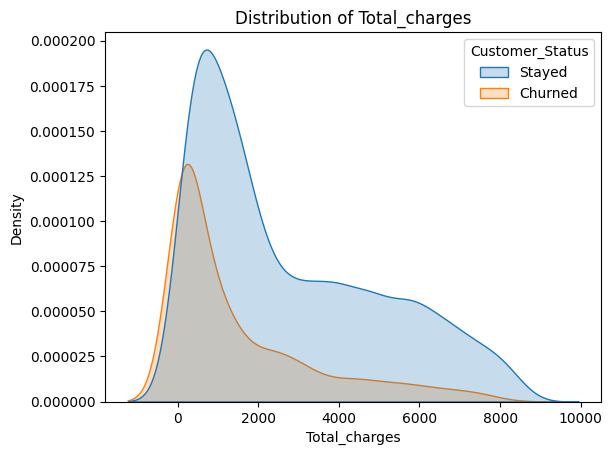

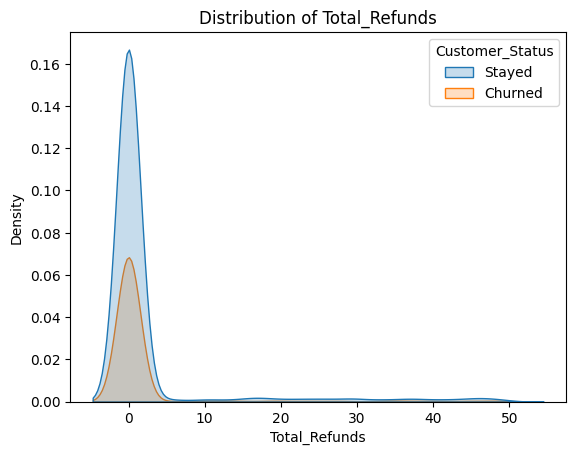

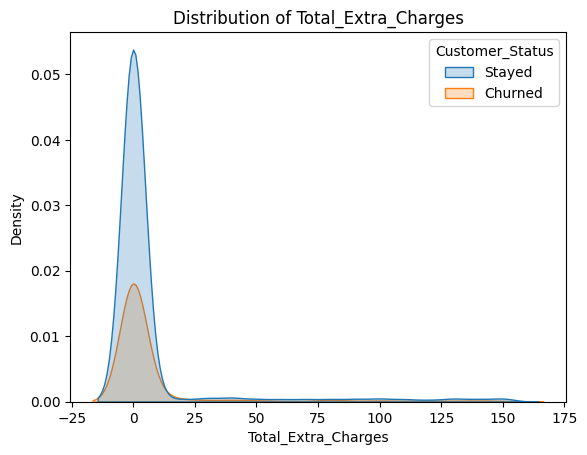

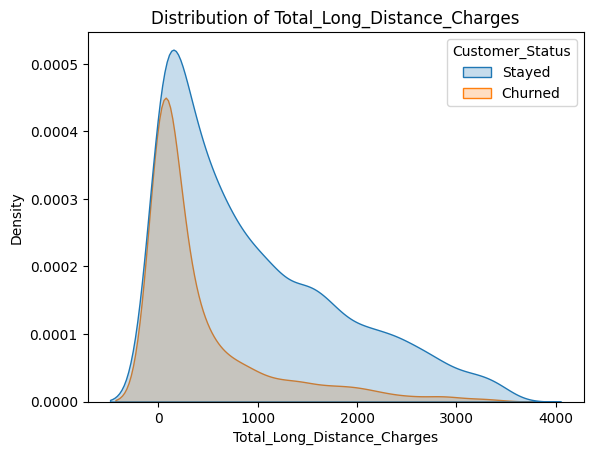

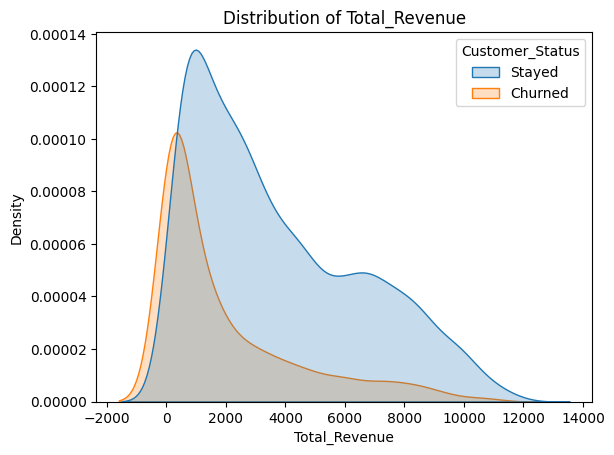

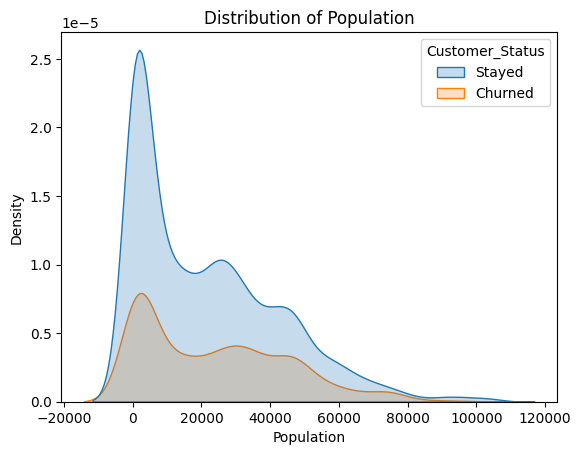

In [118]:
for i , index in enumerate(df[num_cols]):
    plt.figure(i)
    plt.title('Distribution of {0}'.format(index))
    sns.kdeplot(data=df, x=index, hue='Customer_Status',fill=True)

#### Age

The Kernel Density Estimate (KDE) plot showing the distribution of customer ages split by Customer_Status (Stayed vs. Churned).

Here’s a breakdown of what the chart tells us:

* Stayed Customers (blue area):
The age distribution is quite uniform between ~20 and ~70, with peaks around 25–30 and 40–50. This suggests that retained customers are spread widely across working-age groups.

* Churned Customers (orange area):
The churned group has a much lower density overall compared to the stayed group, but the distribution shape is similar — flat across most ages, tapering off after ~75.

Key Insight:

Churned customers exist across all age ranges, but proportionally fewer compared to those who stayed.

Since the curves overlap almost perfectly, age alone may not be a strong differentiator of churn.

Other features (like tenure, service usage, or charges) might have stronger predictive power for churn.


#### tenure in Months

* Churned Customers (orange area):

The density is heavily concentrated at low tenure (0–12 months).

This means customers are most likely to churn shortly after joining.

The probability of churn decreases steadily as tenure increases.

* Stayed Customers (blue area):

Their distribution is much more spread out, with noticeable peaks around 10 months and again around 70 months.

This suggests that customers who make it past the early period (say, after a year) are much more likely to stay long term.

Key Insight:

Tenure is a strong predictor of churn.

The sharp early spike in churn highlights the importance of early engagement and onboarding — if customers don’t find value quickly, they leave.

Retention strategies should be targeted especially at new customers in their first few months.

#### Number of Dependent

This density plot shows the distribution of the number of dependents for customers, separated by their customer status (stayed or churned).

Here's an analysis of the data:

The plot shows that the vast majority of both "Stayed" and "Churned" customers have zero dependents. The peak at 0 for both groups is very high, indicating this is the most common number of dependents.

The "Churned" distribution is much more concentrated at 0 dependents, with a much smaller number of churned customers having 1 or more dependents.

The "Stayed" distribution also has a strong peak at 0 dependents, but it shows additional smaller peaks at 1, 2, and 3 dependents. This indicates that a greater proportion of customers with dependents have stayed, while those with zero dependents are more susceptible to churning.

The chart suggests that while having no dependents is the most common state for all customers, having one or more dependents may be a positive factor for customer retention.

#### Number of Referrals

This density plot shows the distribution of the number of referrals for customers, separated by their customer status (stayed or churned).

Here's an analysis of the data:

The plot shows a very strong peak at zero referrals for both "Stayed" and "Churned" customers, indicating that the majority of customers in both groups have not referred anyone. The peak is particularly high for churned customers, suggesting that a large proportion of customers who churn have not referred any new business.

The "Stayed" distribution shows a much broader tail and additional peaks at 1 and 2 referrals, and extends to a higher number of referrals. This indicates that customers who have stayed are much more likely to have referred others.

The "Churned" distribution is heavily concentrated at 0 and 1 referrals and drops off quickly, indicating that customers who churn are very unlikely to have referred multiple people.

The chart strongly suggests that customers who have referred others are much more likely to stay. The number of referrals is a clear indicator of customer loyalty and retention.

#### Long distance Charges

This density plot shows the distribution of average monthly long-distance charges for customers, separated by their customer status (stayed or churned).

Here's an analysis of the data:

The distribution for "Stayed" customers is relatively flat and broad, spanning a wide range of long-distance charges from near 0 to about 50. This indicates that customers who stay have a diverse range of long-distance spending habits.

The distribution for "Churned" customers has a similar overall shape but with a lower density across all long-distance charges.

The plot shows that long-distance charges are present in both stayed and churned customer groups, but the density of stayed customers is higher across the board. The shape of the two distributions is very similar, suggesting that the average monthly long-distance charge itself may not be a strong predictor of churn. The proportion of customers who churn seems to be relatively consistent across the various levels of long-distance spending.

#### Avg Monthly GB Download

This density plot shows the distribution of average monthly gigabytes downloaded for customers, separated by their customer status (stayed or churned).

Here's an analysis of the data:

The distribution for "Stayed" customers shows several peaks, most notably a large peak near 0 GB and another significant peak around 20-25 GB. This indicates that a large number of stayed customers have very low data usage, while another large group has moderate data usage.

The distribution for "Churned" customers is heavily concentrated at lower download amounts, with a large peak also near 0 GB and a smaller peak around 20-25 GB.

A key observation is that at low data usage levels (around 0-30 GB), the proportion of churned customers is relatively high. As the download amount increases (above 40 GB), the density of "Stayed" customers remains relatively higher than the density of "Churned" customers.

The chart suggests that customers with very low data usage might be more susceptible to churn. However, it also shows that churn occurs across the spectrum of data usage, with a significant portion of churned customers having moderate usage.

### Monthly Charges

This density plot shows the distribution of monthly charges for customers, separated by their customer status (stayed or churned).

Here's a breakdown of the data:

The distribution for "Stayed" customers has two main peaks: a very high peak at a lower monthly charge (around 20) and a broader, less pronounced peak at higher monthly charges (around 80).

The distribution for "Churned" customers has a lower density at the low monthly charge range and a much more pronounced, single peak at the higher monthly charge range (around 80). The density of churned customers is highest at the higher monthly charges.

The plot strongly suggests a relationship between monthly charges and customer churn. Customers with higher monthly charges are more likely to churn. The peak of the "churned" distribution is at a much higher monthly charge than the main peak of the "stayed" distribution. This indicates that customers paying a premium for services are more likely to leave the company.


#### Total Charges

This density plot shows the distribution of total charges for customers, separated by their customer status (stayed or churned).

Here's a breakdown of the data:

The distribution for "Stayed" customers has a long, broad tail, indicating that they have a wide range of total charges, including many with very high total charges. The peak of this distribution is at a relatively low total charge.

The distribution for "Churned" customers is much more concentrated at lower total charges, with a high peak close to 0. It drops off quickly, indicating that very few churned customers have high total charges.

The plot strongly suggests that customers with low total charges are much more likely to churn. This aligns with the previous observation about tenure, as customers with low tenure would naturally have low total charges and are also the most likely to churn. Conversely, customers with high total charges (who are likely long-term customers) have a much lower churn rate.


#### Total Long Distance Charges


This density plot shows the distribution of total long-distance charges for customers, separated by their customer status (stayed or churned).

Here's an analysis of the data:

The distribution for "Stayed" customers has a long, broad tail, indicating that they have a wide range of total long-distance charges, including many with very high charges. The peak of this distribution is at a low total long-distance charge.

The distribution for "Churned" customers is much more concentrated at lower total long-distance charges, with a high peak close to 0. It drops off quickly, indicating that very few churned customers have high total long-distance charges.

The plot strongly suggests that customers with low total long-distance charges are more likely to churn. This is similar to the trend observed with total charges and tenure, where customers who have been with the company for a shorter time and have accumulated fewer charges are more likely to leave. Customers with high total long-distance charges are likely long-tenured and therefore have a lower churn rate.


#### Total revenue


This density plot shows the distribution of total revenue for customers, separated by their customer status (stayed or churned).

Here's a breakdown of the data:

The distribution for "Stayed" customers has a long, broad tail, indicating that they have a wide range of total revenue, including many with very high revenue. The peak of this distribution is at a relatively low total revenue.

The distribution for "Churned" customers is much more concentrated at lower total revenue, with a high peak close to 0. It drops off quickly, indicating that very few churned customers have high total revenue.

The plot strongly suggests that customers who generate low total revenue are much more likely to churn. This is consistent with the previous observations about tenure and total charges, as these are all related to how long a customer has been with the company. Customers who have generated high total revenue are likely long-term customers and have a much lower churn rate.



### Statistical analysis

In [90]:
from scipy.stats import chi2_contingency,ttest_ind,f_oneway, ttest_1samp,ttest_rel

In [91]:
contigency_table = pd.crosstab(columns=df['Gender'],index=df['Customer_Status'])
contigency_table

Gender,Female,Male
Customer_Status,,
Churned,939,930
Stayed,2338,2382


In [121]:
def chi2_test(table,target,null_text=None,alt_text=None,alpha =0.05):
    chi2,p_value, degree_of_freedom,expected_frequencies = chi2_contingency(table)

    if null_text is None:
        null_text = f"There is no statistical significance between {target} and customer status."
    if alt_text is None:
        alt_text = f"Reject null hypothesis ,There is a statistical significance between {target} and customer status."

    print("chi2 test : {:.4f}".format(chi2))
    print("P_value: {:.4f}".format(p_value))
    print("Degree of freedom: {:.4f}".format(degree_of_freedom))
    print("Expected Frequencies: {}".format(expected_frequencies))

    if p_value <= alpha:
        print(alt_text)
    else:
        print(null_text)

In [122]:
chi2_test(contigency_table,'Gender')

chi2 test : 0.2401
P_value: 0.6242
Degree of freedom: 1.0000
Expected Frequencies: [[ 929.53604492  939.46395508]
 [2347.46395508 2372.53604492]]
There is no statistical significance between Gender and customer status.


**Interpretation**

1. p-value = 0.6242 > 0.05

    * We fail to reject the null hypothesis.

    *This means there’s no statistically significant relationship between Gender and Customer_Status.

**Practical meaning:**

* Whether a customer churns or stays is not influenced by gender in this dataset.

* Gender is not a good predictor of churn and may not add much value to a churn prediction model.
2. Expected vs. Observed frequencies:

* The expected frequencies (under independence) are very close to what was actually observed.

That’s another reason the test shows no significant difference.

In [96]:
contract_table = pd.crosstab(columns=df['Contract'],index=df['Customer_Status'])
contract_table  


Contract,Month-to-Month,One Year,Two Year
Customer_Status,,,
Churned,1655,166,48
Stayed,1547,1360,1813


In [123]:
chi2_test(contract_table,'Contract')

chi2 test : 1695.6941
P_value: 0.0000
Degree of freedom: 2.0000
Expected Frequencies: [[ 908.26195174  432.85688268  527.88116558]
 [2293.73804826 1093.14311732 1333.11883442]]
Reject null hypothesis ,There is a statistical significance between Contract and customer status.


A Chi-square test of independence was performed to examine the relationship between Contract and Customer_Status. The results were statistically significant, χ²(2, N = total_customers) = 1695.69, p < 0.001, indicating that contract type is strongly associated with customer churn. Customers on month-to-month contracts exhibited substantially higher churn rates compared to those on longer-term contracts.

In [98]:
internet_type_table = pd.crosstab(columns=df['Internet_Type'],index=df['Customer_Status'])
internet_type_table

Internet_Type,Cable,DSL,Fiber Optic,None
Customer_Status,,,,
Churned,213,307,1236,113
Stayed,561,1230,1698,1231


In [125]:
chi2_test(internet_type_table,'Internet Type')

chi2 test : 590.4380
P_value: 0.0000
Degree of freedom: 3.0000
Expected Frequencies: [[ 219.54864168  435.97708302  832.24252542  381.23174989]
 [ 554.45135832 1101.02291698 2101.75747458  962.76825011]]
Reject null hypothesis ,There is a statistical significance between Internet Type and customer status.


A Chi-square test of independence revealed a significant association between Internet_Type and Customer_Status, chi2 = 590.44, p < 0.001. Customers with fiber optic internet showed disproportionately higher churn rates compared to DSL or non-internet users, suggesting that internet type plays a critical role in churn behavior.

In [100]:
stayed_avg_monthly_download = df[df['Customer_Status']=="Stayed"]['Avg_Monthly_GB_Download']
churned_avg_monthly_download=df[df['Customer_Status']=="Churned"]['Avg_Monthly_GB_Download']

In [126]:
def t_test(series1, series2, target, Null_hyp=None, alt_hyp=None, alpha=0.05):
    if Null_hyp is None:
        Null_hyp = f"There is no statistical significance between {target} and customer status."
    if alt_hyp is None:
        alt_hyp=f"Reject null hypothesis ,There is a statistical significance between {target} and customer status."


    result = ttest_ind(series1,series2,equal_var=False)
    print('T_test : {:.4f}'.format(result.statistic))
    print('P_valus: {:.4f}'.format(result.pvalue))


    if result.pvalue <= alpha:
        print(alt_hyp)
    else :
        print(Null_hyp)

    

In [127]:
t_test(stayed_avg_monthly_download,churned_avg_monthly_download,'Avg Monthly GB Download')

T_test : -3.4630
P_valus: 0.0005
Reject null hypothesis ,There is a statistical significance between Avg Monthly GB Download and customer status.


In [103]:
stayed_avg_long_distance_charges = df[df['Customer_Status']=="Stayed"]['Avg_Monthly_Long_Distance_charges']
churned_avg_long_distance_charges = df[df['Customer_Status']=="Churned"]['Avg_Monthly_Long_Distance_charges']

An independent samples t-test compared the average monthly GB download of stayed vs. churned customers. Results showed a significant difference, t_stat = -3.46, p < 0.001. On average, churned customers downloaded less data per month compared to customers who stayed, suggesting that low data usage is a risk factor for churn.

In [104]:
t_test(stayed_avg_long_distance_charges,churned_avg_long_distance_charges,'Avg_monthly Long Distance Charges')

T_test : -0.5407
P_valus: 0.5888
There is no statistical significance between Avg_monthly Long Distance Charges and customer status.


An independent samples t-test compared the average monthly long-distance charges of stayed vs. churned customers. Results showed no significant difference, t_stat = -0.54, p = 0.59. This indicates that long-distance charges do not influence churn behavior and are unlikely to be a strong predictor of customer attrition.

In [105]:
stayed_total_charges = df[df['Customer_Status']=="Stayed"]['Total_charges']
churned_total_charges = df[df['Customer_Status']=="Churned"]['Total_charges']

In [106]:
t_test(stayed_total_charges,churned_total_charges,'Total Charges')

T_test : 22.8073
P_valus: 0.0000
Reject null hypothesis ,There is a statistical significance between Total Charges and customer status.


An independent samples t-test was conducted to compare total charges between stayed and churned customers. Results were highly significant, t_stat = 22.81, p < 0.001, indicating that stayed customers had substantially higher total charges compared to churned customers. This result aligns with tenure differences, as long-term customers naturally accumulate more charges and are less likely to churn.

### Prepare Data For Prediction

In [107]:
churn_df = df.copy()

In [108]:
churn_df['Customer_Status']= churn_df['Customer_Status'].map({"Churned":1,"Stayed":0})

### Drop Unwanted Columns

In [109]:
churn_df.columns

Index(['Customer_id', 'Gender', 'Age', 'Married', 'Number_of_Dependent',
       'City', 'Zipcode', 'Latitude', 'Longitude', 'Number_of_Referrals',
       'Tenure_in_Months', 'Offer', 'Phone_Service',
       'Avg_Monthly_Long_Distance_charges', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Avg_Monthly_GB_Download',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Tech_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_charges', 'Total_Refunds',
       'Total_Extra_Charges', 'Total_Long_Distance_Charges', 'Total_Revenue',
       'Customer_Status', 'Churn_Category', 'Churn_Reason', 'Population',
       'tenure_group', 'Age group'],
      dtype='object')

In [110]:
churn_df.drop(columns=['Customer_id','City', 'Zipcode', 'Latitude', 'Longitude', 'Age group','tenure_group', 'Churn_Category', 'Churn_Reason', 'Population','Offer','Tenure_in_Months'],inplace=True)

### Save file

In [111]:
churn_df.to_csv('Customer_Churn.csv',index=False,encoding="utf-8", na_rep="None")